<a href="https://colab.research.google.com/github/zreal135/Team_Pandas/blob/main/Team_Pandas_DatafestAfrica_ML_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**DataFestAfrica ML Hackathon**

In [ ]:
!pip install automl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Libraries**

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import missingno as msno
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score

**Data collection from Github**

In [11]:
#loading the dataset from github
train = pd.read_csv('https://raw.githubusercontent.com/zreal135/Team_Pandas/main/train.csv')
test = pd.read_csv ('https://raw.githubusercontent.com/zreal135/Team_Pandas/main/test.csv')

In [12]:
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [13]:
train.tail()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
12511,7100872,31,weekly,0,3015,0,2,1,2,2,...,450,42450,0.643778,0.901396,0.632284,0.856231,0.666399,0.566399,6,1
12512,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
12513,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
12514,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1
12515,1498559,29,weekly,1,2665,0,4,10,4,1,...,600,64950,0.720889,0.874372,0.505565,0.631619,0.846163,0.846163,4,1


In [14]:
test.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
1,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
2,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
3,6493191,32,semi-monthly,0,5260,3,0,3,1,4,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3
4,8990111,61,bi-weekly,1,3270,0,4,0,4,3,1,400,61700,0.659736,0.937287,0.852323,0.785698,0.632466,0.732466,7


In [15]:
test.tail()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
5387,9056719,32,semi-monthly,1,2205,0,3,3,1,5,0,450,42600,0.575193,0.867671,0.549352,0.735433,0.662761,0.762761,4
5388,3077109,51,bi-weekly,0,2055,0,2,0,3,8,1,500,56800,0.735554,0.958610,0.503029,0.866972,0.310552,0.610552,5
5389,1807355,44,bi-weekly,0,5025,6,2,3,6,3,1,500,54500,0.711895,0.911418,0.522509,0.712864,0.484913,0.584913,9
5390,3983229,54,bi-weekly,0,2620,5,2,1,4,2,1,600,55450,0.638183,0.973020,0.502234,0.731239,0.579557,0.679557,6
5391,9442442,46,bi-weekly,0,6525,0,2,1,3,3,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3


In [17]:
# Describing the datasets to get various summary statistics
train.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.251600e+04,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000
mean,5.599485e+06,43.026766,0.425056,3654.110658,1.191355,3.532998,3.593161,3.402205,3.508469,0.795462,950.251518,61133.401246,0.690665,0.877954,0.582848,0.718456,0.621944,0.621912,6.494088,0.540588
std,2.563354e+06,11.865891,0.494371,1508.072163,2.404529,2.265293,2.749211,2.206649,1.959969,0.403380,706.915146,15396.809340,0.090294,0.054197,0.125260,0.121103,0.139876,0.139623,3.731870,0.498370
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.376885e+06,34.000000,0.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49450.000000,0.641221,0.850893,0.499887,0.635005,0.519794,0.519662,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3255.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699621,0.880993,0.588202,0.725717,0.624081,0.623781,6.000000,1.000000
75%,7.803325e+06,51.000000,1.000000,4661.250000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752053,0.911485,0.672431,0.806576,0.729609,0.728389,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,14.000000,1.000000,10200.000000,99750.000000,0.999997,0.999012,0.978932,0.993363,0.970249,0.966953,30.000000,1.000000


In [18]:
test.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
count,5.392000e+03,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000
mean,5.591158e+06,42.989058,0.425445,3664.419696,1.173591,3.512611,3.565096,3.485163,3.491469,0.795252,950.898924,60976.975148,0.691371,0.879023,0.583866,0.717779,0.625825,0.622431,6.371662
std,2.560655e+06,11.890900,0.494456,1497.592328,2.392621,2.246915,2.758409,2.238133,1.945444,0.403555,678.778145,15389.196157,0.090886,0.055402,0.124607,0.119760,0.139361,0.140549,3.531746
min,1.120829e+06,18.000000,0.000000,1030.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,4450.000000,0.166305,0.536474,0.083435,0.214770,0.010184,0.077332,1.000000
25%,3.379710e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49137.500000,0.640538,0.850846,0.501415,0.631126,0.526619,0.520130,4.000000
50%,5.608240e+06,42.000000,0.000000,3265.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,700.000000,61075.000000,0.699448,0.881027,0.588260,0.723621,0.629588,0.620804,6.000000
75%,7.818549e+06,51.000000,1.000000,4701.250000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.754393,0.914777,0.672339,0.806918,0.730264,0.730639,8.000000
max,9.997079e+06,86.000000,1.000000,9813.000000,11.000000,15.000000,12.000000,11.000000,15.000000,1.000000,10100.000000,99300.000000,0.999948,0.999024,0.949421,0.996260,0.963075,0.953601,30.000000


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              5392 non-null   int64  
 1   age                   5392 non-null   int64  
 2   pay_schedule          5392 non-null   object 
 3   home_owner            5392 non-null   int64  
 4   income                5392 non-null   int64  
 5   months_employed       5392 non-null   int64  
 6   years_employed        5392 non-null   int64  
 7   current_address_year  5392 non-null   int64  
 8   personal_account_m    5392 non-null   int64  
 9   personal_account_y    5392 non-null   int64  
 10  has_debt              5392 non-null   int64  
 11  amount_requested      5392 non-null   int64  
 12  risk_score            5392 non-null   int64  
 13  risk_score_2          5392 non-null   float64
 14  risk_score_3          5392 non-null   float64
 15  risk_score_4         

In [19]:
# check the shape of the datasets
train.shape, test.shape

((12516, 21), (5392, 20))

In [26]:
#check for the number of unique provided
train.home_owner.nunique(), train.pay_schedule.nunique(), train.has_debt.nunique(), train.e_signed.nunique()

(2, 4, 2, 2)

In [20]:
#examining the numerical features in the train set
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.columns

Index(['Entry_id', 'age', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed'],
      dtype='object')

In [23]:
#examining the categorical features in the train set
cat_features = train.select_dtypes(include = [np.object])
cat_features.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Index(['pay_schedule'], dtype='object')

**Data cleaning**

In [33]:
#checking for missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Entry_id,0,0.0
amount_requested,0,0.0
inquiries_last_month,0,0.0
ext_quality_score_2,0,0.0
ext_quality_score,0,0.0
risk_score_5,0,0.0
risk_score_4,0,0.0
risk_score_3,0,0.0
risk_score_2,0,0.0
risk_score,0,0.0


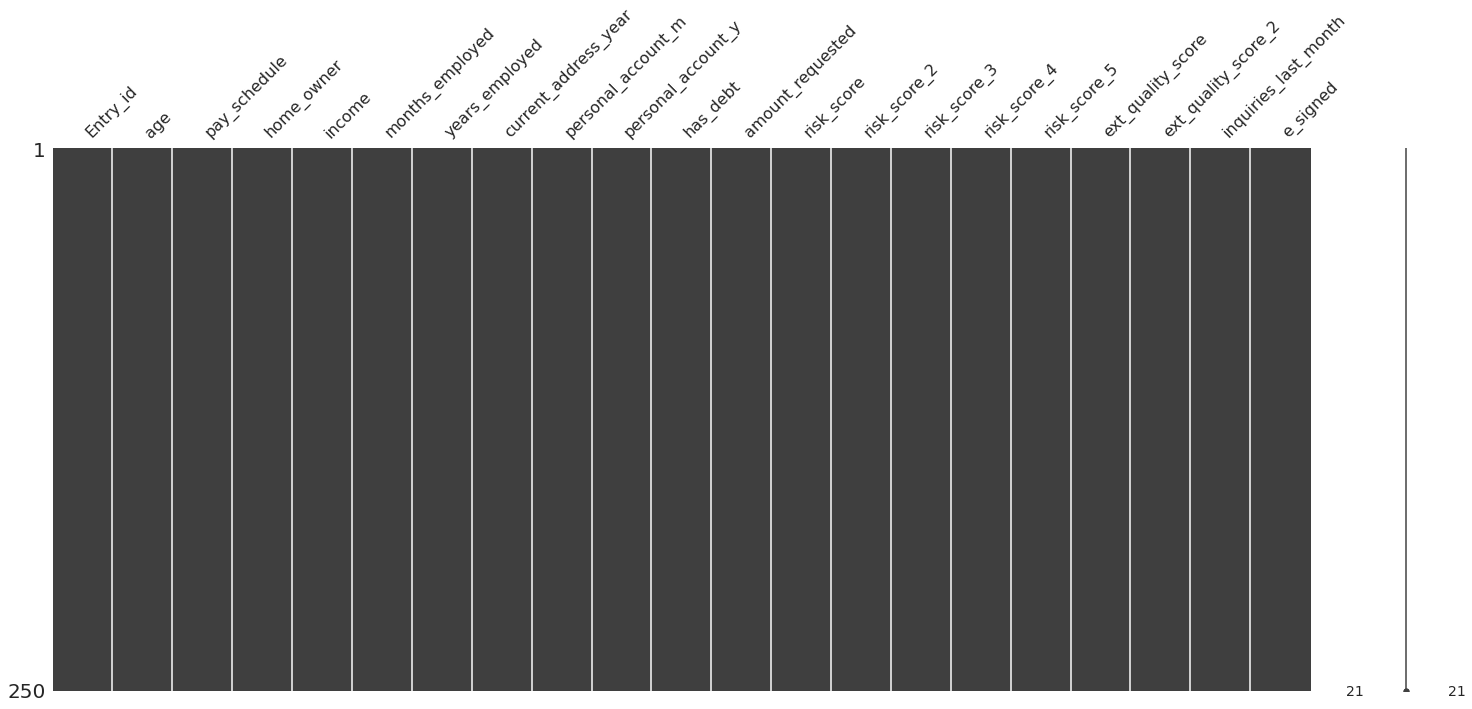

In [30]:
#checking for missing data through visualization
msno.matrix(train.sample(250))


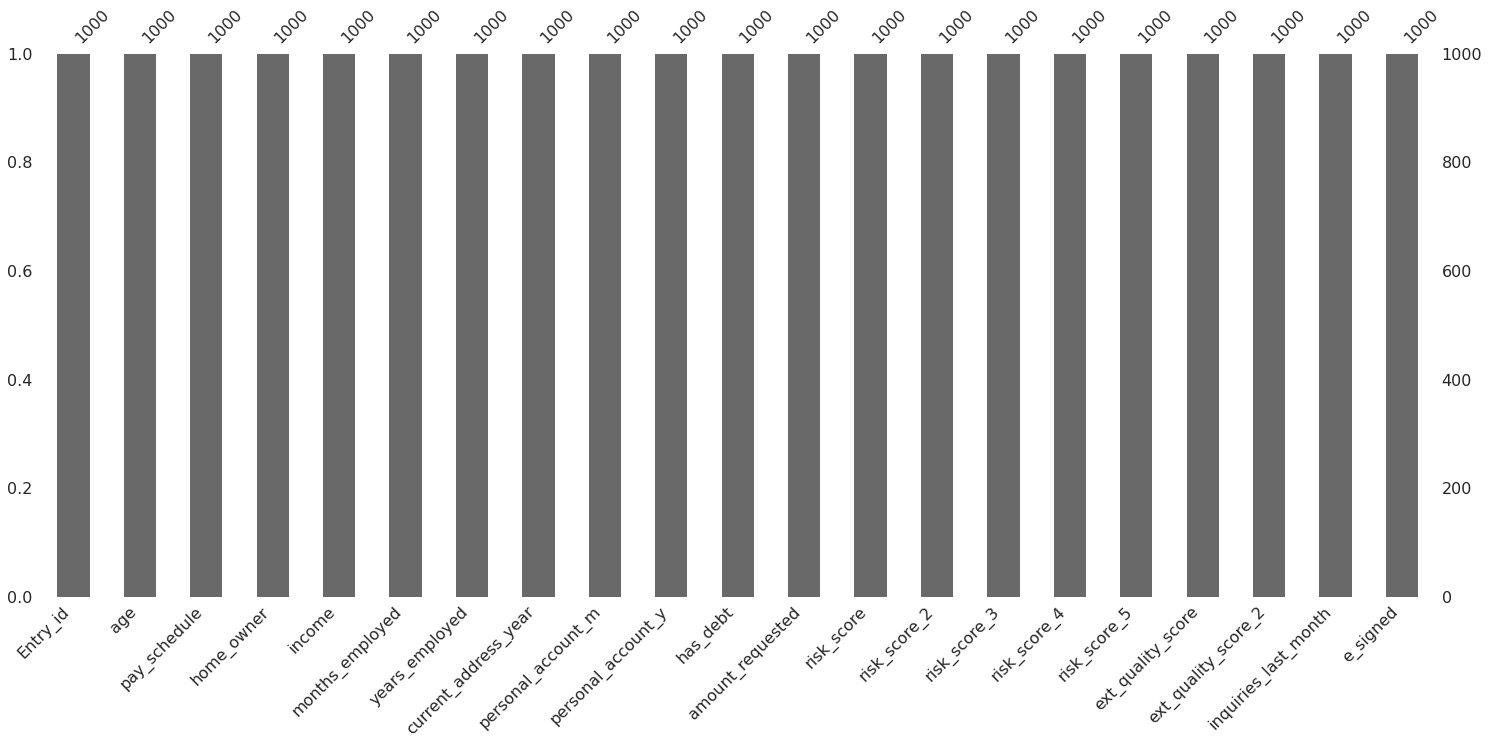

In [32]:
msno.bar(train.sample(1000))